In [16]:
#Liabraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

print("Important libraries loaded successfully")

Important libraries loaded successfully


In [17]:
data_train = pd.read_csv("train.csv")
print("Data shape = ",data_train.shape)
data_train.head()

Data shape =  (7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


0    4342
1    3271
Name: target, dtype: int64


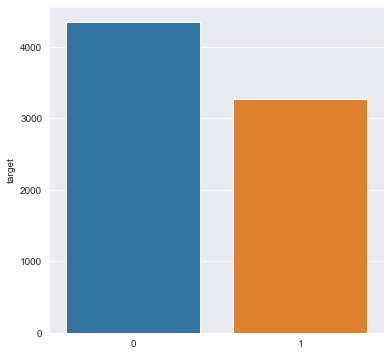

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,6))
x=data_train['target'].value_counts()
print (x)
sns.barplot(x.index,x)

In [ ]:
#Data Preprocessing

In [18]:
# Missing data 
total = data_train.isnull().sum().sort_values(ascending=False)

#get percent of missing data relevant to all data
percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(data_train.shape[1])

,Total,Percent
location,2533,0.332720
keyword,61,0.008013
target,0,0.000000
text,0,0.000000
id,0,0.000000


In [19]:
data_train.groupby('location')['id'].count()

location
                          1
  Glasgow                 1
  Melbourne, Australia    1
  News                    1
  å_                      1
                         ..
å_: ?? ÌÑ ? : ?           1
å_å_Los Mina Cityã¢      1
å¡å¡Midwest Û¢Û¢        1
åÊ(?Û¢`?Û¢å«)??         1
åø\_(?)_/åø               1
Name: id, Length: 3341, dtype: int64

In [20]:
data_train = data_train.drop(['location','keyword'], axis=1)
print("location and keyword columns droped successfully")

location and keyword columns droped successfully


In [21]:
data_train = data_train.drop('id', axis=1)
print("id column droped successfully")

id column droped successfully


In [22]:
data_train.columns

Index(['text', 'target'], dtype='object')

In [23]:
data_train["text"].head(10)

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I'm on top of the hill and I can see a fire in...
8    There's an emergency evacuation happening now ...
9    I'm afraid that the tornado is coming to our a...
Name: text, dtype: object

In [24]:
corpus  = []
pstem = PorterStemmer()
for i in range(data_train['text'].shape[0]):
    #Remove unwanted words
    tweet = re.sub("[^a-zA-Z]", ' ', data_train['text'][i])
    #Transform words to lowercase
    tweet = tweet.lower()
    tweet = tweet.split()
    #Remove stopwords then Stemming it
    tweet = [pstem.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    #Append cleaned tweet to corpus
    corpus.append(tweet)
    
print("Corpus created successfully") 

Corpus created successfully


In [25]:
print(pd.DataFrame(corpus)[0].head(10))

0            deed reason earthquak may allah forgiv us
1                 forest fire near la rong sask canada
2    resid ask shelter place notifi offic evacu she...
3          peopl receiv wildfir evacu order california
4    got sent photo rubi alaska smoke wildfir pour ...
5    rockyfir updat california hwi close direct due...
6    flood disast heavi rain caus flash flood stree...
7                               top hill see fire wood
8               emerg evacu happen build across street
9                             afraid tornado come area
Name: 0, dtype: object


In [26]:
rawTexData = data_train["text"].head(10)
cleanTexData = pd.DataFrame(corpus, columns=['text after cleaning']).head(10)

frames = [rawTexData, cleanTexData]
result = pd.concat(frames, axis=1, sort=False)
result

,text,text after cleaning
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquak may allah forgiv us
1,Forest fire near La Ronge Sask. Canada,forest fire near la rong sask canada
2,All residents asked to 'shelter in place' are ...,resid ask shelter place notifi offic evacu she...
3,"13,000 people receive #wildfires evacuation or...",peopl receiv wildfir evacu order california
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo rubi alaska smoke wildfir pour ...
5,#RockyFire Update => California Hwy. 20 closed...,rockyfir updat california hwi close direct due...
6,#flood #disaster Heavy rain causes flash flood...,flood disast heavi rain caus flash flood stree...
7,I'm on top of the hill and I can see a fire in...,top hill see fire wood
8,There's an emergency evacuation happening now ...,emerg evacu happen build across street
9,I'm afraid that the tornado is coming to our a...,afraid tornado come area


In [27]:
#Create our dictionary 
uniqueWordFrequents = {}
for tweet in corpus:
    for word in tweet.split():
        if(word in uniqueWordFrequents.keys()):
            uniqueWordFrequents[word] += 1
        else:
            uniqueWordFrequents[word] = 1
            
#Convert dictionary to dataFrame
uniqueWordFrequents = pd.DataFrame.from_dict(uniqueWordFrequents,orient='index',columns=['Word Frequent'])
uniqueWordFrequents.sort_values(by=['Word Frequent'], inplace=True, ascending=False)
uniqueWordFrequents.head(10)

,Word Frequent
co,4746
http,4721
like,411
fire,363
amp,344
get,311
bomb,239
new,228
via,220
u,216


In [28]:
uniqueWordFrequents['Word Frequent'].unique()

array([4746, 4721,  411,  363,  344,  311,  239,  228,  220,  216,  213,
        210,  209,  201,  183,  181,  180,  178,  175,  169,  166,  164,
        162,  156,  155,  153,  151,  145,  144,  143,  137,  133,  132,
        131,  130,  129,  128,  125,  124,  123,  122,  121,  120,  119,
        118,  117,  116,  114,  111,  110,  109,  108,  106,  105,  104,
        103,  102,  101,  100,   99,   98,   97,   96,   95,   94,   93,
         91,   90,   89,   88,   87,   86,   84,   83,   82,   79,   78,
         77,   76,   75,   74,   73,   72,   71,   70,   69,   68,   67,
         66,   65,   64,   63,   62,   61,   60,   59,   58,   57,   56,
         55,   54,   53,   52,   51,   50,   49,   48,   47,   46,   45,
         44,   43,   42,   41,   40,   39,   38,   37,   36,   35,   34,
         33,   32,   31,   30,   29,   28,   27,   26,   25,   24,   23,
         22,   21,   20,   19,   18,   17,   16,   15,   14,   13,   12,
         11,   10,    9,    8,    7,    6,    5,   

In [29]:
uniqueWordFrequents = uniqueWordFrequents[uniqueWordFrequents['Word Frequent'] >= 20]
print(uniqueWordFrequents.shape)
uniqueWordFrequents

(787, 1)


,Word Frequent
co,4746
http,4721
like,411
fire,363
amp,344
...,...
cnn,20
gem,20
captur,20
arriv,20


In [30]:
counVec = CountVectorizer(max_features = uniqueWordFrequents.shape[0])
bagOfWords = counVec.fit_transform(corpus).toarray()

In [31]:
X = bagOfWords
y = data_train['target']
print("X shape = ",X.shape)
print("y shape = ",y.shape)

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.20, random_state=55, shuffle =True)
print('data splitting successfully')

X shape =  (7613, 787)
y shape =  (7613,)
data splitting successfully


In [32]:
decisionTreeModel = DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = None, 
                                           splitter='best', 
                                           random_state=55)

decisionTreeModel.fit(X_train,y_train)

print("decision Tree Classifier model run successfully")

decision Tree Classifier model run successfully


In [33]:
gradientBoostingModel = GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 100,
                                                   max_depth = 30,
                                                   random_state=55)

gradientBoostingModel.fit(X_train,y_train)

print("gradient Boosting Classifier model run successfully")

gradient Boosting Classifier model run successfully


In [34]:
KNeighborsModel = KNeighborsClassifier(n_neighbors = 7,
                                       weights = 'distance',
                                      algorithm = 'brute')

KNeighborsModel.fit(X_train,y_train)

print("KNeighbors Classifier model run successfully")

KNeighbors Classifier model run successfully


In [35]:
LogisticRegression = LogisticRegression(penalty='l2', 
                                        solver='saga', 
                                        random_state = 55)  

LogisticRegression.fit(X_train,y_train)

print("LogisticRegression Classifier model run successfully")

LogisticRegression Classifier model run successfully


In [36]:
from sklearn.linear_model import SGDClassifier
SGDClassifier = SGDClassifier(loss = 'hinge', 
                              penalty = 'l1',
                              learning_rate = 'optimal',
                              random_state = 55, 
                              max_iter=100)

SGDClassifier.fit(X_train,y_train)

print("SGDClassifier Classifier model run successfully")

SGDClassifier Classifier model run successfully


In [37]:
SVClassifier = SVC(kernel= 'linear',
                   degree=3,
                   max_iter=10000,
                   C=2, 
                   random_state = 55)

SVClassifier.fit(X_train,y_train)

print("SVClassifier model run successfully")

SVClassifier model run successfully


In [38]:
bernoulliNBModel = BernoulliNB(alpha=0.1)
bernoulliNBModel.fit(X_train,y_train)

print("bernoulliNB model run successfully")

bernoulliNB model run successfully


In [39]:
from sklearn.naive_bayes import GaussianNB
gaussianNBModel = GaussianNB()
gaussianNBModel.fit(X_train,y_train)

print("gaussianNB model run successfully")

gaussianNB model run successfully


In [40]:
from sklearn.naive_bayes import MultinomialNB
multinomialNBModel = MultinomialNB(alpha=0.1)
multinomialNBModel.fit(X_train,y_train)

print("multinomialNB model run successfully")

multinomialNB model run successfully


In [41]:
from sklearn.ensemble import VotingClassifier
modelsNames = [('LogisticRegression',LogisticRegression),
               ('SGDClassifier',SGDClassifier),
               ('SVClassifier',SVClassifier),
               ('bernoulliNBModel',bernoulliNBModel),
               ('multinomialNBModel',multinomialNBModel)]

votingClassifier = VotingClassifier(voting = 'hard',estimators= modelsNames)
votingClassifier.fit(X_train,y_train)
print("votingClassifier model run successfully")

votingClassifier model run successfully


NameError: name 'train' is not defined

In [42]:
#evaluation Details
models = [decisionTreeModel, gradientBoostingModel, KNeighborsModel, LogisticRegression, 
         SVClassifier, bernoulliNBModel]

for model in models:
    print(type(model).__name__,' Train Score is   : ' ,model.score(X_train, y_train))
    print(type(model).__name__,' Test Score is    : ' ,model.score(X_test, y_test))
    
    y_pred = model.predict(X_test)
    print(type(model).__name__,' F1 Score is      : ' ,f1_score(y_test,y_pred))
    print('--------------------------------------------------------------------------')

DecisionTreeClassifier  Train Score is   :  0.9761904761904762
DecisionTreeClassifier  Test Score is    :  0.7419566644780039
DecisionTreeClassifier  F1 Score is      :  0.6743993371996686
--------------------------------------------------------------------------
GradientBoostingClassifier  Train Score is   :  0.8594417077175698
GradientBoostingClassifier  Test Score is    :  0.7511490479317138
GradientBoostingClassifier  F1 Score is      :  0.6331074540174251
--------------------------------------------------------------------------
KNeighborsClassifier  Train Score is   :  0.9761904761904762
KNeighborsClassifier  Test Score is    :  0.7406434668417596
KNeighborsClassifier  F1 Score is      :  0.5872518286311389
--------------------------------------------------------------------------
LogisticRegression  Train Score is   :  0.8502463054187193
LogisticRegression  Test Score is    :  0.7826657912015759
LogisticRegression  F1 Score is      :  0.7230125523012553
-------------------------